<img src="Img01.jfif"/>

<center><h1 Style="color:#0000FF">Analisis de Datos</h1></center>
<center><h5 Style="color:#00008B">Universidad Castro Carazo</h5></center>
<center><h5 Style="color:#00008B">IQ-2023</h5></center>
</br>
<p Syle="text-align: justify">Este notebook contiene el analisis de los datos de los vehiculos a la venta por parte de la empresa Pk2, esta empresa se encuentra interesada en responder una pregunta de negocio particular.

Como se puede incrementar las ventas de autos de segunda mano?

Para esto se realiza un analisis del conjunto de datos facilitado por la empresa a efectos de poder brindar conocimiento sobre las ditribuciones de sus lotes de venta, los autos con mayor precio, o caracteristicas de los autos, esto para dotar de insumos suficientes a la toma de desiciones

</p>

</br>

<a href="https://archive.ics.uci.edu/ml/datasets/Automobile"> Fuente de datos para el proceso de analisis </a>

<h2 Style="color:#008B8B">1. Cargar y estandarizar los set de datos</h2>
</br>
<p Syle="text-align: justify">Que se hace en esta etapa</p>
<ol>
    <li>Importar las librerias de Python necesarias</li>
    <li>Importar el o los set de datos</li>
    <li>Revisar los encabezados de los Dataframes</li>
    <li>si solo si tenemos mas de un set de datos lo vamos unir en uno solo</li>
</ol>
<h3 Style="color:#4B0082">A.Importar las librerias de Python necesarias</h3>

In [1]:
import pandas as pd #se usa para el manejo de grandes volumenes de datos - Data Frame
import numpy as np #se usa para el manejo de estructuras de datos
import matplotlib as mpl
import matplotlib.pyplot as plt #se usa para graficos

In [2]:


mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

<h3 Style="color:#4B0082">B.Importar el o los set de datos</h3>

In [3]:
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors",
"style", "wheels", "engine", "base", "length", "width", "heingt",
"curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
"compression", "horsepower", "peak", "City", "Higway", "price"]


df_1er_set = pd.read_csv("autos.csv", names=cols)
df_2do_set = pd.read_csv("Autos1.csv", names=cols)

In [4]:
df_1er_set.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df_1er_set.tail(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [6]:
df_1er_set.shape

(197, 26)

In [7]:
df_1er_set.describe ()

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
df_1er_set.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engine-size  197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  


<h2 Style="color:#008B8B">1. Cargar y estandarizar los set de datos</h2>

<p Syle="text-align: justify">se motiva la estandarizacion de los nombres de las columnas, considerando lo siguiente</p>

<ol>
    <li>Los nombres de las columnas no deben contener espacios en blanco</li>
    <li>Los nombres no deben empezar por numeros</li>
    <li>Si el nombre se conforma por dos o mas palabras la letra inicial de cada palabra va en mayuscula</li>
    <li>No deben existir nombres repetidos</li>
</ol>


In [9]:
df_1er_set.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [10]:
df_2do_set.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [11]:
df_1er_set.rename({'engine-size':'engineSize'},axis=1,inplace=True)
df_2do_set.rename({'engine-size':'engineSize'},axis=1,inplace=True)

In [12]:
df_1er_set.head(2)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [13]:
df_2do_set.head(2)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9989


<h3 Style="color:#008B8B"> Unir los set de datos</h3>

In [14]:
unionArchivos = [df_1er_set,df_2do_set]
dfAutos = pd.concat (unionArchivos)
dfAutos.shape

(226, 26)

In [15]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


<h2 Style="color:#008B8B">2. Manejo de valores faltantes</h2>
</br>
<p Syle="text-align: justify">que se hace en esta etapa</p>
</br>

<ol>
    <li>Identificar como se muestran los valores faltantes y estandarazarlos</li>
    <li>Contar la cantidad de valores faltantes por variables</li>
    <li>Analizar la imputacion de valores numericos (con la media)</li>
    <li>Analizar la imputacion de valores categoricos (con la media)</li>
    <li>Analizar la imputacion de valores categoricos (con valor mas frecuente)</li>
    <li>Eliminar filas con valores faltantes</li>
</ol>

<h3 Style="color:#008B8B">A. Identificar como se muestran los valores faltantes y estandarazarlos</h3>


In [16]:
dfAutos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
25,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
26,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
27,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


In [17]:
dfAutos.replace('?', np.nan, inplace=True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [18]:
dfValoresFaltantes=dfAutos.isnull()
dfValoresFaltantes.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
for column in dfValoresFaltantes.columns.values.tolist():
    print(column)
    print(dfValoresFaltantes[column].value_counts())
    print("")


symboling
False    226
Name: symboling, dtype: int64

normalized
False    180
True      46
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engineSize
False    226
Name: engineSize, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True       

<h3 Style="color:#008B8B">B. Analizar la imputacion de valores numericos</h3>

In [20]:
mean_value = dfAutos ['normalized'].astype('float').mean(axis=0)
print("La media de normalized es: ",mean_value)

La media de normalized es:  122.28333333333333


In [21]:
mean_value = dfAutos ['bore'].astype('float').mean(axis=0)
print("La media de normalized es: ",mean_value)

La media de normalized es:  3.319459459459461


In [22]:
mean_value = dfAutos ['stroke'].astype('float').mean(axis=0)
print("La media de normalized es: ",mean_value)

La media de normalized es:  3.2785135135135075


In [23]:
mean_value = dfAutos ['horsepower'].astype('float').mean(axis=0)
print("La media de normalized es: ",mean_value)

La media de normalized es:  102.98214285714286


In [24]:
mean_value = dfAutos ['peak'].astype('float').mean(axis=0)
print("La media de normalized es: ",mean_value)

La media de normalized es:  5100.892857142857


In [25]:
dfAutos['normalized'].replace(np.nan,122,inplace=True)
dfAutos['bore'].replace(np.nan,3.31,inplace=True)
dfAutos['stroke'].replace(np.nan,3.27,inplace=True)
dfAutos['horsepower'].replace(np.nan,102,inplace=True)
dfAutos['peak'].replace(np.nan,5100,inplace=True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [26]:
dfAutos['doors'].value_counts().idxmax()

'four'

In [27]:
dfAutos['doors'].replace(np.nan,'four',inplace=True)


<h2 Style="color:#008B8B">C. Eliminar valores faltantes</h2>

In [28]:
dfAutos.dropna(subset=['price'],axis=0,inplace=True)
dfAutos.reset_index(drop=True, inplace=True)

In [29]:
dfValoresFaltantes=dfAutos.isnull()
for column in dfValoresFaltantes.columns.values.tolist():
    print(column)
    print(dfValoresFaltantes[column].value_counts())
    print("")

symboling
False    222
Name: symboling, dtype: int64

normalized
False    222
Name: normalized, dtype: int64

make
False    222
Name: make, dtype: int64

fuel
False    222
Name: fuel, dtype: int64

aspiration
False    222
Name: aspiration, dtype: int64

doors
False    222
Name: doors, dtype: int64

style
False    222
Name: style, dtype: int64

wheels
False    222
Name: wheels, dtype: int64

engine
False    222
Name: engine, dtype: int64

base
False    222
Name: base, dtype: int64

length
False    222
Name: length, dtype: int64

width
False    222
Name: width, dtype: int64

heingt
False    222
Name: heingt, dtype: int64

curb
False    222
Name: curb, dtype: int64

engineType
False    222
Name: engineType, dtype: int64

Cylinders
False    222
Name: Cylinders, dtype: int64

engineSize
False    222
Name: engineSize, dtype: int64

system
False    222
Name: system, dtype: int64

bore
False    222
Name: bore, dtype: int64

stroke
False    222
Name: stroke, dtype: int64

compression
False    2

<h2 Style="color:#008B8B">3. Estandarización de los datos</h2>
</br>
<p Syle="text-align: justify">que se hace en esta etapa</p>
</br>

<ol>
    <li>Verificar el dominio de cada variable y se ajusta si es necesario</li>
    <li>Se convierten los valores en funcion de su interpretacion</li>
    <li>Se normalizan los datos para que los valres queden entre 0 y 1</li>
    <li>Crear categorias para el resumen de datos</li>

</ol>

<h3 Style="color:#008B8B">A. Verificar el dominio de cada variable y se ajusta si es necesario</h3>

In [30]:
dfAutos.head (5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [31]:
dfAutos.dtypes

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [32]:
dfAutos [['normalized']] = dfAutos [['normalized']].astype("int")
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [33]:
dfAutos [['bore','stroke','peak','price']] = dfAutos [['bore','stroke','peak','price']].astype("float")
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower      object
peak           float64
City             int64
Higway           int64
price          float64
dtype: object

In [34]:
dfAutos [['horsepower']] = dfAutos [['horsepower']].astype("int")
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower       int32
peak           float64
City             int64
Higway           int64
price          float64
dtype: object

<h3 Style="color:#008B8B">B. Se convierten los valores en funcion de su interpretacion</h3>

In [35]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0


In [36]:
dfAutos["City L/100km"] = 235/dfAutos["City"]
dfAutos.head (3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,system,bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421


<h3 Style="color:#008B8B">C. Se normalizan los datos para que los valores queden entre 0 y 1</h3>

In [37]:
dfAutos.head(4)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,system,bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667


In [38]:
dfTemp = dfAutos[["length", "width","heingt"]]
dfTemp.head(5)

,length,width,heingt
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [39]:
dfAutos["lengthnorm"]=dfAutos["length"]/dfAutos["length"].max()
dfAutos["widthnorm"]=dfAutos["width"]/dfAutos["width"].max()
dfAutos["heingtnorm"]=dfAutos["heingt"]/dfAutos["heingt"].max()

dfTemp = dfAutos[["lengthnorm", "widthnorm","heingtnorm"]]
dfTemp.head(5)

,lengthnorm,widthnorm,heingtnorm
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [40]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,compression,horsepower,peak,City,Higway,price,City L/100km,lengthnorm,widthnorm,heingtnorm
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,13495.0,11.190476,0.811148,0.890278,0.816054
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,16500.0,11.190476,0.811148,0.890278,0.816054
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,26,16500.0,12.368421,0.822681,0.909722,0.876254


<h3 Style="color:#008B8B">D.Binning crear categorias para el resumen de datos</h3>

In [41]:
dfTemp = dfAutos[["horsepower"]]
dfTemp.head(5)

,horsepower
0,111
1,111
2,154
3,102
4,115


In [42]:
dfAutos.describe()

,symboling,normalized,base,length,width,heingt,curb,engineSize,bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100km,lengthnorm,widthnorm,heingtnorm
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.909910,122.229730,98.661261,174.064865,65.836036,53.766667,2540.418919,126.450450,3.319955,3.280090,10.323514,102.180180,5093.468468,25.445946,30.990991,12780.941441,9.803749,0.836448,0.914389,0.899108
std,1.280198,33.651614,5.648067,11.720591,1.970382,2.367974,494.544729,40.226562,0.258981,0.305005,4.179231,36.334344,481.973832,6.272417,6.701787,7530.446820,2.441520,0.056322,0.027366,0.039598
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.678039,0.837500,0.799331
25%,0.000000,101.000000,94.500000,167.350000,64.200000,52.000000,2209.000000,98.000000,3.150000,3.150000,8.625000,70.000000,4800.000000,20.250000,25.000000,7898.000000,7.833333,0.804181,0.891667,0.869565
50%,1.000000,122.000000,97.250000,173.200000,65.500000,54.100000,2414.000000,115.000000,3.310000,3.350000,9.000000,95.000000,5100.000000,25.000000,30.000000,10221.500000,9.400000,0.832292,0.909722,0.904682
75%,2.000000,136.250000,102.300000,180.200000,66.500000,55.675000,2841.250000,146.000000,3.580000,3.447500,9.400000,116.000000,5500.000000,30.000000,34.000000,15628.750000,11.610119,0.865930,0.923611,0.931020
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000,1.000000


In [43]:
bins = np.linspace(min(dfAutos["horsepower"]), max(dfAutos["horsepower"]),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [44]:
groupNames=["Pequeño","Mediano","Grande"]
dfAutos['horsepowerBins']=pd.cut(dfAutos["horsepower"],bins, labels=groupNames, include_lowest=True)
dfAutos[['horsepower','horsepowerBins']].head(5)

,horsepower,horsepowerBins
0,111,Pequeño
1,111,Pequeño
2,154,Mediano
3,102,Pequeño
4,115,Pequeño


In [45]:
dfAutos['horsepowerBins'].value_counts()

Pequeño    174
Mediano     43
Grande       5
Name: horsepowerBins, dtype: int64

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(dfAutos['horsepowerBins'])
plt.pyplot.xlabel("Caballos de Fuerza")
plt.pyplot.ylabel("Cantidad segun tamaño")

<h2 Style="color:#008B8B">4. Visualización de datos</h2>
</br>
<p Syle="text-align: justify">que se hace en esta etapa</p>
</br>

<ol>
    <li>Identificar las preguntas de negocio</li>
    <li>Dar un formato o agrupar los datos para crear el grafico</li>
    <li>Dar formato a los graficos</li>
    <li>Generar reporte escrito</li>
</ol>

<h2 Style="color:#008B8B">¿Cual marca de carros tenemos mas en el inventario?</h2>
</br>

In [46]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,horsepower,peak,City,Higway,price,City L/100km,lengthnorm,widthnorm,heingtnorm,horsepowerBins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,13495.0,11.190476,0.811148,0.890278,0.816054,Pequeño
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,16500.0,11.190476,0.811148,0.890278,0.816054,Pequeño
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,19,26,16500.0,12.368421,0.822681,0.909722,0.876254,Mediano


In [47]:
#se agrupan y cuenta la cantidad de registro segun marca
dfGraf =dfAutos.groupby(['make']).count()
#se selecciona unicamente el indice y la primera columna
dfGraf= dfGraf.iloc[:,:1]
#se ordenan los datos de mayor a menor
dfGraf = dfGraf.sort_values('symboling',ascending = False)
dfGraf.shape

(22, 1)

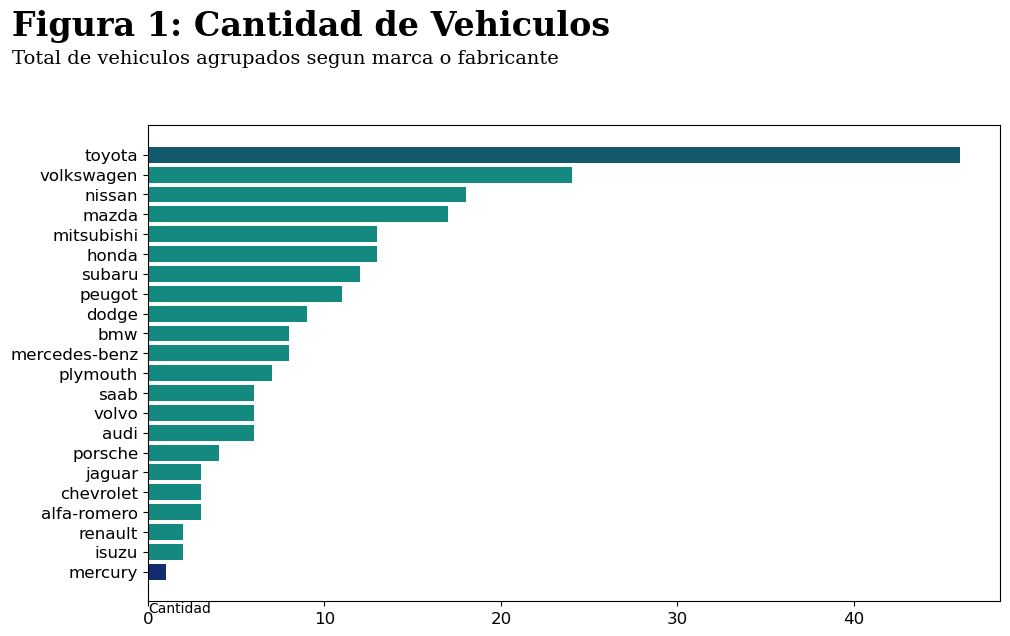

In [48]:
plt.rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(11,6.9), dpi=100)


eje_x = dfGraf.index.tolist()
eje_y = dfGraf['symboling'].tolist()

y_pos = np.arange(len(eje_x))


#generación de colores
bar_colors = ['#12596e','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#14897f','#122e6e']

#creacion del grafico
ax.barh(y_pos, eje_y, align='center', color = bar_colors)

#formato del grafico

#-----Titulo

title_t= "Figura 1: Cantidad de Vehiculos"
ax.set_title(title_t, loc ='left', x=0.001, y=0.93,transform=fig.transFigure, fontsize=24, fontweight = "bold",fontfamily= "serif")


#-------Subtitulo
subtitle_t= "Total de vehiculos agrupados segun marca o fabricante"
plt.suptitle (subtitle_t, horizontalalignment='left', x=0.001, y=0.91,transform=fig.transFigure, fontsize=14, fontweight = "regular",fontfamily= "serif")


#--------Etiquetas en el eje x y y
label = "Cantidad"

ax.set_xlabel(label, 
              ha= "left",
              fontsize=10, 
              fontweight = "regular",
              fontfamily= "sans" )

ax.xaxis.set_label_coords(x=0,
                          y=0,
                          transform=ax.transAxes)

ax.tick_params(axis ='both',
               labelsize=12)




ax.set_yticks(y_pos, labels=eje_x)
ax.invert_yaxis()  # labels read top-to-bottom

plt.subplots_adjust(top=0.80)


plt.show()

<h2 Style="color:#008B8B">¿Cual es la distribucion de autos segun su estilo?</h2>


In [49]:
#se agrupan y cuenta la cantidad de registro segun marca
dfGraf =dfAutos.groupby(['style']).count()
#se selecciona unicamente el indice y la primera columna
dfGraf= dfGraf.iloc[:,:1]
#se ordenan los datos de mayor a menor
dfGraf = dfGraf.sort_values('symboling',ascending = False)
dfGraf


,symboling
style,
sedan,103
hatchback,75
wagon,26
hardtop,10
convertible,8


<h2 Style="color:#008B8B">¿Cuantos autos existen segun cantidad de cilindros?</h2>

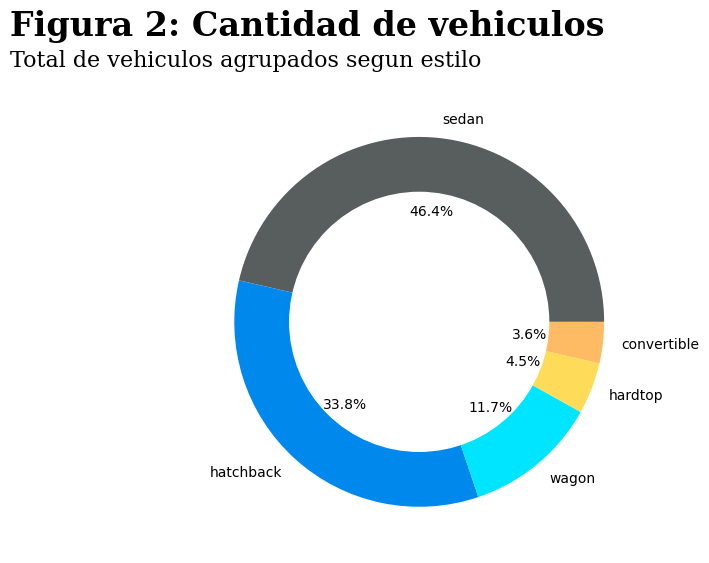

In [50]:
names =dfGraf.index.tolist()
style =dfGraf[ 'symboling'].tolist()
fig,ax=plt.subplots(1,1,figsize=(8,6.9),dpi=100)
circulo = plt.Circle((0,0), 0.7, color="white") #Este circulo es la base del grafico de anillos

plt.pie(style,
        labels=names,
        autopct='%1.1f%%',
        colors=['#585d5d', '#0088ed', '#00e5ff','#ffdb5a', '#ffba64'])

#Formato del grafico

#. Titulos y subtitulos del grafico

title_t = "Figura 2: Cantidad de vehiculos"

ax.set_title(title_t,
             horizontalalignment = 'left',
             x=0.001,
             y=0.86,
             transform=fig.transFigure,
             fontsize=24,
             fontweight="bold",
             fontfamily="serif")

subtitle_t = "Total de vehiculos agrupados segun estilo"
plt.suptitle (subtitle_t,
              horizontalalignment = 'left',
              x = 0.001,
              y = 0.84,
              transform = fig.transFigure,
              fontsize=16,
              fontweight="regular",
              fontfamily="serif")

plt.subplots_adjust (top=0.78)

p = plt.gcf()
p.gca ().add_artist(circulo)
plt.show()
                     
              



In [51]:
#se agrupan y cuenta la cantidad de registro segun marca
dfGraf =dfAutos.groupby(['Cylinders']).count()
#se selecciona unicamente el indice y la primera columna
dfGraf= dfGraf.iloc[:,:1]
#se ordenan los datos de mayor a menor
dfGraf = dfGraf.sort_values('symboling',ascending = False)
dfGraf


  

,symboling
Cylinders,
four,175
six,26
five,11
eight,4
two,4
three,1
twelve,1


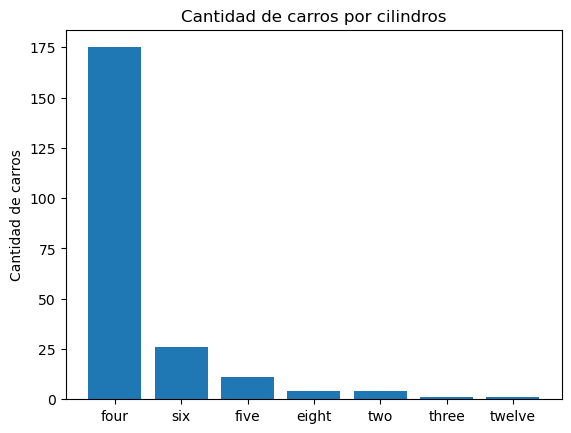

In [52]:
fig, ax = plt.subplots()

eje_x = dfGraf.index.tolist()
eje_y = dfGraf['symboling'].tolist()

ax.bar(eje_x, eje_y)

ax.set_ylabel('Cantidad de carros')
ax.set_title('Cantidad de carros por cilindros')

plt.show()

<h2 Style="color:#008B8B">Existe alguna relación entre precio y estilo?</h2>

In [53]:

dfGraf =dfAutos['style']


In [54]:

dfGraf1 =dfAutos['price']


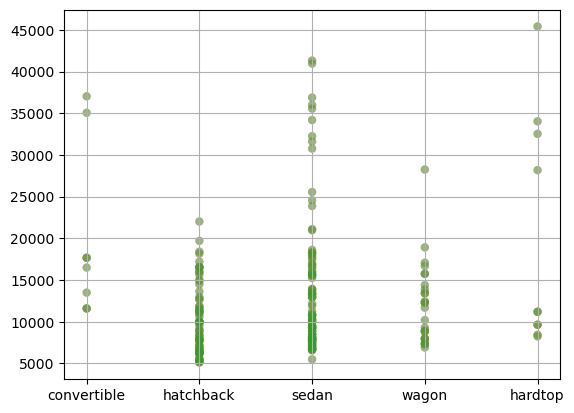

In [56]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    x =dfGraf
    y =dfGraf1
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color,
               alpha=0.3, edgecolors='none')

#ax.legend()
ax.grid(True)

plt.show()   

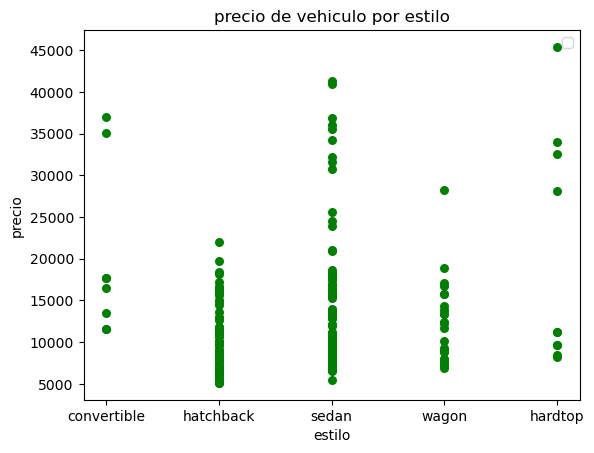

In [59]:
x = dfGraf
y = dfGraf1
plt.scatter(x,y,label='price',marker='o',s=30,color='green')
plt.xlabel('estilo')
plt.ylabel('precio')
plt.title('precio de vehiculo por estilo')
plt.legend('')
plt.show()